# UC pseudotime

## cytotrace

In [ ]:
import scvelo as scv
import cellrank as cr

In [ ]:
_ls = ["0", "7", "11"]
ad_ciz = ad[ad.obs.eval("Sample in ['Large Nodule', 'Small Nodule'] & Cluster in @_ls")]

In [ ]:
ad_ciz.X = ad_ciz.layers['raw'].copy()

In [ ]:
sc.pp.filter_genes(ad_ciz, min_cells=10)

/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.


In [ ]:
sc.pp.highly_variable_genes(ad_ciz, flavor='seurat_v3', n_top_genes=1000)

scv.pp.normalize_per_cell(ad_ciz)
sc.pp.log1p(ad_ciz)

ad_ciz.layers["spliced"] = ad_ciz.X
ad_ciz.layers["unspliced"] = ad_ciz.X

scv.pp.moments(ad_ciz, n_pcs=30, n_neighbors=30)
# scv.pp.moments(ad_ciz, n_neighbors=30, use_rep='X_scvi')

Normalized count data: X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:15) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
ad_ciz

AnnData object with n_obs × n_vars = 6838 × 31785
    obs: 'batch', 'n_genes', 'n_counts', 'percent_ct', 'leiden_0.0', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'leiden_1.6', 'leiden_1.7', 'leiden_1.8', 'leiden_1.9', 'leiden_2.0', 'leiden', 'UMI counts', 'Gene counts', 'Sample', 'leiden_R', 'Cluster', 'Cell type', '__group', 'Sample_two', 'Partition', 'UMI counts log10', 'Sample_new', 'wgcna_cluster', 'cluster_mergeUC', 'Sample_time', 'vb_ct'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches', 'mean', 'std', 'SNF', 'means_ForPickMock', 'Cluster_2_mean', 'Cluster_2_expressedRatio', 'Cluster_12_mean', 'Cluster_12_expressedRatio', 'Cluster_9_mean', 'Cluster_9_expressedRatio', 'Cluster_4_mean', 'Cluster_4_expressedRatio', 'Cluster_0_mean', 'Cluste

In [ ]:
from cellrank.tl.kernels import CytoTRACEKernel

ctk = CytoTRACEKernel(ad_ciz)

In [ ]:
ctk.compute_transition_matrix(threshold_scheme="soft", nu=0.5)
ctk.compute_projection(basis="umap")

  0%|          | 0/6838 [00:00<?, ?cell/s]

In [ ]:
_dt = singleCellTools.basic.getadataColor(ad, "Cluster")
ad_ciz = singleCellTools.basic.setadataColor(ad_ciz, "Cluster", _dt)

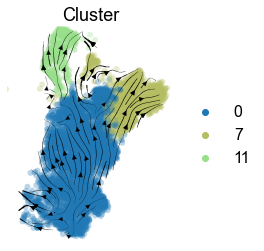

In [ ]:
with plt.rc_context({"figure.figsize": (3, 4)}):
    ax = scv.pl.velocity_embedding_stream(
        ad_ciz,
        color="Cluster",
        vkey="T_fwd",
        basis="umap",
        legend_loc="right",
        smooth=0.5,
        min_mass=3,
        title="Cluster",
        legend_fontsize=16,
        show=False,
        fontsize=18
    )
    plt.sca(ax)
    plt.xlim(3, 13)
#     for text in ax.texts:
#         text.set_color('black')
    plt.show()

In [ ]:
from cellrank.tl.estimators import GPCCA

g_fwd = GPCCA(ctk)
print(g_fwd)

GPCCA[n=6838, kernel=<CytoTRACEKernel[dnorm=False, scheme=soft, b=10.0, nu=0.5]>]


Mat Object: 1 MPI processes
  type: seqdense
1.0000000000000002e+00 -1.3451811240545000e-02 -6.7646899729889012e-03 2.2948015605340516e-02 -6.5394745934908025e-03 -1.7084586751363498e-02 3.8429786583646771e-04 -3.6594000640256093e-02 -2.2549879339336918e-02 5.4377189336820564e-03 -3.8900647407905962e-02 1.5281971719723590e-02 1.1929486536118791e-02 2.8574492438253440e-02 -4.8147440921371493e-02 6.5807556367455259e-03 -5.7265620685272689e-02 2.5269023116557450e-04 -2.5595612228181620e-02 -2.5380435719810197e-02 
0.0000000000000000e+00 9.9574004181986508e-01 -6.4117460866483164e-03 4.7159515370456748e-03 -1.9550522125730586e-02 2.0379591995956240e-02 2.7806638725345254e-02 -3.5513370589696426e-02 -1.6354801406212635e-02 1.3858483423501104e-03 1.1049553367956787e-02 -1.0011282480857361e-02 -2.8619389580210216e-04 8.6534741977150435e-03 -1.7615037311385560e-02 -9.0789982484496563e-03 -2.7557405991521386e-02 -5.1932883597652435e-03 -3.3778092836776142e-03 -3.2582799780006805e-02 
0.00000000

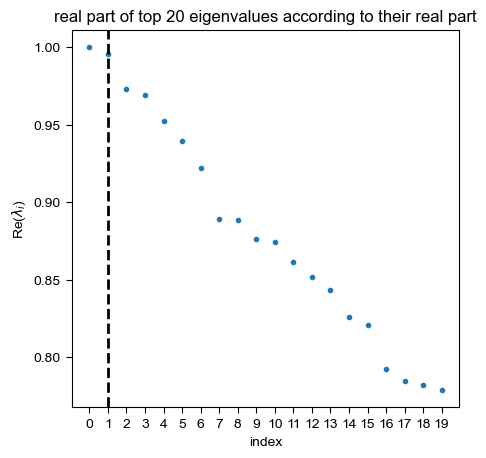

In [ ]:
g_fwd.compute_schur(n_components=20)
g_fwd.plot_spectrum(real_only=True)

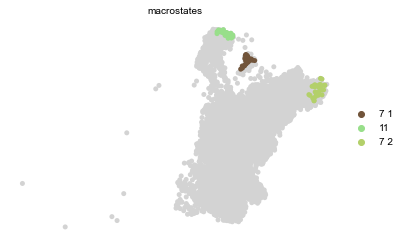

In [ ]:
g_fwd.compute_macrostates(n_states=3, cluster_key="Cluster")
g_fwd.plot_macrostates(
    discrete=True, legend_loc="right", size=100, basis="umap"
)

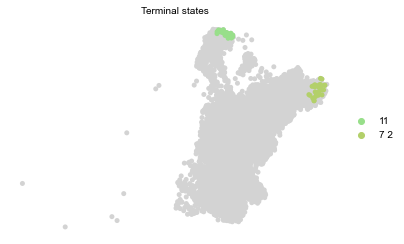

In [ ]:
ax = g_fwd.plot_macrostates(
    ['11', '7_2'],discrete=True, legend_loc="right", size=100, basis="umap", title='Terminal states'
)

In [ ]:
ax

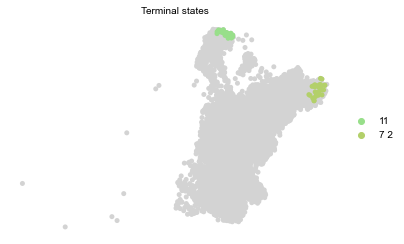

In [ ]:
ax = g_fwd.plot_macrostates(
    ['11', '7_2'],discrete=True, legend_loc="right", size=100, basis="umap", title='Terminal states'
)

In [ ]:
ax

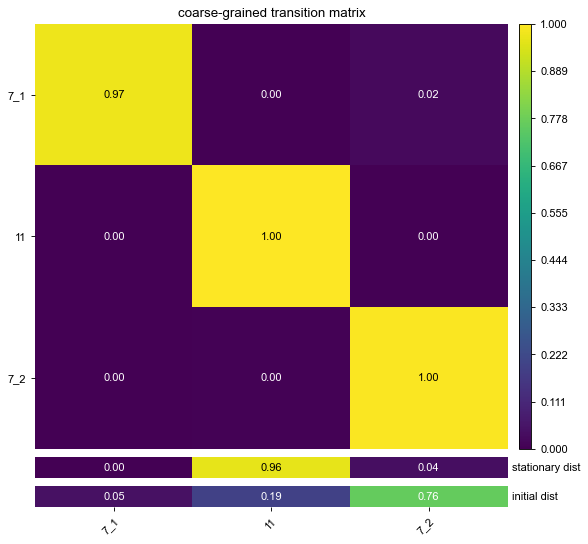

In [ ]:
g_fwd.plot_coarse_T(show_initial_dist=True)

In [ ]:
g_fwd.compute_macrostates(n_states=3, cluster_key="Cluster")
g_fwd.set_terminal_states_from_macrostates(names={"11": "11", "7_2": "7"}) # 7_1  has the smallest value in the coarse-grained stationary distribution, so we don't need to set it as a terminal state

  0%|          | 0/2 [00:00<?, ?/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 


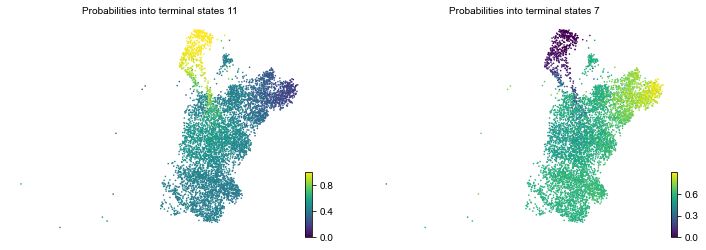

In [ ]:
g_fwd.compute_absorption_probabilities()
g_fwd.plot_absorption_probabilities(same_plot=False, size=10, basis="umap", title=['Probabilities into terminal states 11', 'Probabilities into terminal states 7'])

## RNA velocity

### load data

In [ ]:
dt_loomPath = {"nodule_large":"/data/Zhaijx/liuzj/projects/singleCell/soybean/02_result/20210922/step1_cellRanger/nodule_large/nodule_large/velocyto/nodule_large.loom",
"nodule_small":"/data/Zhaijx/liuzj/projects/singleCell/soybean/02_result/20210922/step1_cellRanger/nodule_small/nodule_small/velocyto/nodule_small.loom",
"root":"/data/Zhaijx/liuzj/projects/singleCell/soybean/02_result/20210922/step1_cellRanger/root/root/velocyto/root.loom"}

In [ ]:
dt_loom = {x:sc.read_loom(y) for x,y in dt_loomPath.items()}

In [ ]:
def reformatLoomAd(ad, batch):
    ad.obs = ad.obs.rename(index = lambda x:x.split(f"{batch}:")[-1][:-1] + '-1')
    return ad

In [ ]:
dt_loom= {x:reformatLoomAd(y, x) for x,y in dt_loom.items()}
ad_loom = sc.concat(dt_loom, index_unique='-batch-')
del(dt_loom)

In [ ]:
# %store ad_loom ad_ciz

Stored 'ad_loom' (AnnData)


In [ ]:
# %store -r ad_loom ad_ciz

In [ ]:
%store -r ad_loom

In [ ]:
import scvelo as scv
import cellrank as cr

In [ ]:
ad_cizForRnaVelocity = ad_loom[ad_ciz.obs.index]
ad_cizForRnaVelocity.obs = ad_ciz.obs

In [ ]:
ad_cizForRnaVelocity.obsm

AxisArrays with keys: 

In [ ]:
ad_cizForRnaVelocity.obsm = ad_ciz.obsm

### two samples

In [ ]:
ad_cizForRnaVelocity

AnnData object with n_obs × n_vars = 6838 × 56826
    obs: 'batch', 'n_genes', 'n_counts', 'percent_ct', 'leiden_0.0', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'leiden_1.6', 'leiden_1.7', 'leiden_1.8', 'leiden_1.9', 'leiden_2.0', 'leiden', 'UMI counts', 'Gene counts', 'Sample', 'leiden_R', 'Cluster', 'Cell type', '__group', 'Sample_two', 'Partition', 'UMI counts log10', 'Sample_new', 'wgcna_cluster', 'cluster_mergeUC', 'Sample_time', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size'
    obsm: 'X_scvi', 'X_scvi_withBatchEffect', 'X_umap', 'jaRelated_marker', 'scDblFinder', 'smDetected_auc', 'sm_auc', 'sn_wgcna_module', 'sn_wgcna_module_0605_triku10000', 'sn_wgcna_module_0605_triku10000_filtered'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [ ]:
scv.pp.filter_and_normalize(ad_cizForRnaVelocity, min_shared_counts=10, n_top_genes=1000)
scv.pp.moments(ad_cizForRnaVelocity, n_pcs=30, n_neighbors=30)

Filtered out 48130 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 1000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
scv.tl.recover_dynamics(ad_cizForRnaVelocity, n_jobs=64)
scv.tl.velocity(ad_cizForRnaVelocity, mode='dynamical')
scv.tl.velocity_graph(ad_cizForRnaVelocity,  n_jobs=64)

recovering dynamics (using 64/64 cores)


  0%|          | 0/858 [00:00<?, ?gene/s]

/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:713: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/python3.8/site-packages/scvelo/tools/dynamical_model.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:01:06) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:08) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 64/64 cores)


  0%|          | 0/6838 [00:00<?, ?cells/s]

/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/python3.8/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [ ]:
# %store ad_cizForRnaVelocity

Stored 'ad_cizForRnaVelocity' (AnnData)


In [ ]:
_dt = singleCellTools.basic.getadataColor(ad, 'Cluster')
singleCellTools.basic.setadataColor(ad_cizForRnaVelocity, 'Cluster', _dt)

AnnData object with n_obs × n_vars = 6838 × 1000
    obs: 'batch', 'n_genes', 'n_counts', 'percent_ct', 'leiden_0.0', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.6', 'leiden_0.7', 'leiden_0.8', 'leiden_0.9', 'leiden_1.0', 'leiden_1.1', 'leiden_1.2', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'leiden_1.6', 'leiden_1.7', 'leiden_1.8', 'leiden_1.9', 'leiden_2.0', 'leiden', 'UMI counts', 'Gene counts', 'Sample', 'leiden_R', 'Cluster', 'Cell type', '__group', 'Sample_two', 'Partition', 'UMI counts log10', 'Sample_new', 'wgcna_cluster', 'cluster_mergeUC', 'Sample_time', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fi

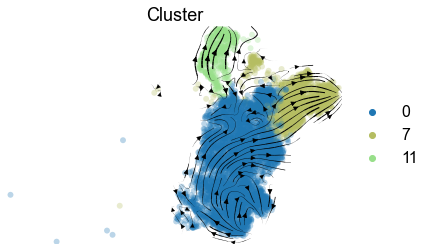

In [ ]:
scv.pl.velocity_embedding_stream(
        ad_cizForRnaVelocity,
        color="Cluster",
        basis="umap",
        legend_loc="right",
        smooth=0.5,
        min_mass=0,
        title="Cluster",
        legend_fontsize=16,
        fontsize=18,
    )

In [ ]:
scv.tl.paga(ad_cizForRnaVelocity, groups='Cluster', vkey='velocity')

running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


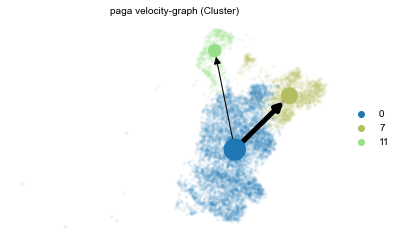

In [ ]:
scv.pl.paga(ad_cizForRnaVelocity, basis='umap', vkey='velocity', node_size_scale=1.5, min_edge_width=1, max_edge_width=5, edge_width_scale=2, use_raw=False, size=50, alpha=0.1)

## monocle3

In [ ]:
Seurat = importr('Seurat')
monocle3 = importr('monocle3')
SeuratWrappers = importr('SeuratWrappers')
ggplot2 = importr('ggplot2')

In [ ]:
def so2cds(so):
    with ro.local_context() as rlc:
        rlc['so'] = so
        R("""
        cds <- as.cell_data_set(so)
        cds <- estimate_size_factors(cds)
        cds@rowRanges@elementMetadata@listData[["gene_short_name"]] <- rownames(so[["RNA"]])
        """)
        cds = rlc['cds']
    return cds

In [ ]:
_ls = ["0", "7", "11"]
_ad = ad[ad.obs.eval("Sample in ['Large Nodule', 'Small Nodule'] & Cluster in @_ls")]
so_ifz = ad2so(_ad)

/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/python3.8/site-packages/rpy2/robjects/conversion.py:28: DeprecationWarning: The use of {name} in module {__name__} is deprecated. Use (__name__}.get_conversion() instead of {__name__}.converter.
  warnings.warn(




/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/python3.8/site-packages/rpy2/robjects/conversion.py:28: DeprecationWarning: The use of {name} in module {__name__} is deprecated. Use (__name__}.get_conversion() instead of {__name__}.converter.
  warnings.warn(




In [ ]:
cds_ifz = so2cds(so_ifz)

In [ ]:
ls_cizHvg = ad_ciz.var.loc[lambda df:df['highly_variable']].index.to_list() >> F(map, lambda x:x.replace('_', '-')) >> F(list)
arR_cizHvg = R.c(*ls_cizHvg)

In [ ]:
%%R -i cds_ifz -i arR_cizHvg
ar_umap <- reducedDim(cds_ifz, 'UMAP')

In [ ]:
%%R 
cds_ifz <- preprocess_cds(cds_ifz, num_dim = 50, use_genes=arR_cizHvg)

# cds <- preprocess_cds(cds, num_dim = 30, use_genes = lsR_hvgGene)
cds_ifz <- align_cds(cds_ifz, alignment_group = "batch")
cds_ifz <- reduce_dimension(cds_ifz)

Please remember to cite:
	 Haghverdi L, Lun ATL, Morgan MD, Marioni JC (2018). 'Batch effects in single-cell RNA-sequencing data are corrected by matching mutual nearest neighbors.' Nat. Biotechnol., 36(5), 421-427. doi: 10.1038/nbt.4091




In [ ]:
%%R
cds_ifz <- cluster_cells(cds_ifz)

In [ ]:
%%R
cds_ifz <- learn_graph(cds_ifz)

  |======================================================================| 100%


/public/home/liuzj/softwares/anaconda3/envs/sc_py/lib/python3.8/site-packages/rpy2/ipython/rmagic.py:813: DeprecationWarning: The `source` parameter emit a  deprecation warning since IPython 8.0, it had no effects for a long time and will  be removed in future versions.
  displaypub.publish_display_data(data=disp_d, source=tag,


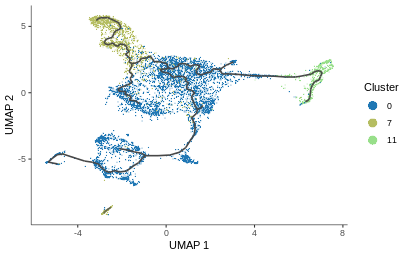

In [ ]:
%%R -w 410 -h 256
plot_cells(cds_ifz, label_groups_by_cluster=T, color_cells_by = "Cluster", group_label_size=0, 
           label_cell_groups=F, label_roots = F,label_leaves = F, label_branch_points =F) + 
    ggplot2::scale_color_manual(values=c('#1f77b4', '#b5bd61', '#98df8a')) +
    theme(legend.position = 'right') 

In [ ]:
%%R
cds_ifz <- order_cells(cds_ifz)

Listening on http://127.0.0.1:6533

Error: cannot open display: localhost:25.0


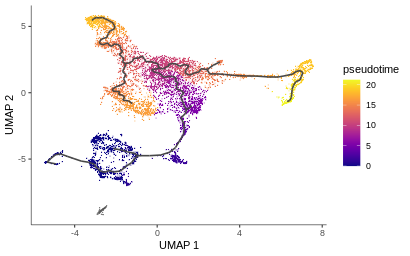

In [ ]:
%%R -w 410 -h 256
plot_cells(cds_ifz,
           color_cells_by = "pseudotime",
           label_cell_groups=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE,
           label_roots=FALSE,
           graph_label_size=1.5)